In [1]:
raw_d_1 = "R1010,D422,L354,U494,L686,U894,R212,U777,L216,U9,L374,U77,R947,U385,L170,U916,R492,D553,L992,D890,L531,U360,R128,U653,L362,U522,R817,U198,L126,D629,L569,U300,L241,U145,R889,D196,L450,D576,L319,D147,R985,U889,L941,U837,L608,D77,L864,U911,L270,D869,R771,U132,L249,U603,L36,D328,L597,U992,L733,D370,L947,D595,L308,U536,L145,U318,R55,D773,R175,D505,R483,D13,R780,U778,R445,D107,R490,U245,L587,U502,R446,U639,R150,U35,L455,D522,R866,U858,R394,D975,R513,D378,R58,D646,L374,D675,R209,U228,R530,U543,L480,U677,L912,D164,L573,U587,L784,D626,L994,U250,L215,U985,R684,D79,L877,U811,L766,U617,L665,D246,L408,U800,L360,D272,L436,U138,R240,U735,L681,U68,L608,D59,R532,D808,L104,U968,R887,U819,R346,U698,L317,U582,R516,U55,L303,U607,L457,U479,L510,D366,L583,U519,R878,D195,R970,D267,R842,U784,R9,D946,R833,D238,L232,D94,L860,D47,L346,U951,R491,D745,R849,U273,R263,U392,L341,D808,R696,U326,R886,D296,L865,U833,R241,U644,R729,D216,R661,D712,L466,D699,L738,U5,L556,D693,R912,D13,R48,U63,L877,U628,L689,D929,R74,U924,R612,U153,R417,U425,L879,D378,R79,D248,L3,U519,R366,U281,R439,D823,R149,D668,R326,D342,L213,D735,R504,U265,L718,D842,L565,U105,L214,U963,R518,D681,R642,U170,L111,U6,R697,U572,R18,U331,L618,D255,R534,D322,L399,U595,L246,U651,L836,U757,R417,D795,R291,U759,L568,U965,R828,D570,R350,U317,R338,D173,L74,D833,L650,D844,L70,U913,R594,U407,R674,D684,L481,D564,L128,D277,R851,D274,L435,D582,R469,U729,R387,D818,R443,U504,R414,U8,L842,U845,R275,U986,R53,U660,R661,D225,R614,U159,R477"
raw_d_2 = "L1010,D698,R442,U660,L719,U702,L456,D86,R938,D177,L835,D639,R166,D285,L694,U468,L569,D104,L234,D574,L669,U299,L124,D275,L179,D519,R617,U72,L985,D248,R257,D276,L759,D834,R490,U864,L406,U181,R911,U873,R261,D864,R260,U759,R648,U158,R308,D386,L835,D27,L745,U91,R840,U707,R275,U543,L663,U736,L617,D699,R924,U103,R225,U455,R708,U319,R569,U38,R315,D432,L179,D975,R519,D546,L295,U680,L685,U603,R262,D250,R7,U171,R261,U519,L832,U534,L471,U431,L474,U886,R10,D179,L79,D555,R452,U452,L832,U863,L367,U538,L237,D160,R441,U605,R942,U259,L811,D552,R646,D353,L225,D94,L35,D307,R752,U23,R698,U610,L379,D932,R698,D751,R178,D347,R325,D156,R471,D555,R558,D593,R773,U2,L955,U764,L735,U438,R364,D640,L757,U534,R919,U409,R361,U407,R336,D808,R877,D648,R610,U198,R340,U94,R795,D667,R811,U975,L965,D224,R565,D681,L64,U567,R621,U922,L665,U329,R242,U592,L727,D481,L339,U402,R213,D280,R656,U169,R976,D962,L294,D505,L251,D689,L497,U133,R230,D441,L90,D220,L896,D657,L500,U331,R502,U723,R762,D613,L447,D256,L226,U309,L935,U384,L740,D459,R309,D707,R952,D747,L304,D105,R977,D539,R941,D21,R291,U216,R132,D543,R515,U453,L854,D42,R982,U102,L469,D639,R559,D68,R302,U734,R980,D214,R107,D191,L730,D793,L63,U17,R807,U196,R412,D592,R330,D941,L87,D291,L44,D94,L272,D780,R968,U837,L712,D704,R163,U981,R537,U778,R220,D303,L196,D951,R163,D446,R11,D623,L72,D778,L158,U660,L189,D510,L247,D716,L89,U887,L115,U114,L36,U81,R927,U293,L265,U183,R331,D267,R745,D298,L561,D918,R299,U810,L322,U679,L739,D854,L581,U34,L862,D779,R23"

d_1 = [(x[0], int(x[1:])) for x in raw_d_1.split(",")]
d_2 = [(x[0], int(x[1:])) for x in raw_d_2.split(",")]

import numpy as np

# Transforms the "direction letters" into numpy vectors
def move_to(letter):
    if letter == "R":
        return np.array([0, 1])
    elif letter == "L":
        return np.array([0, -1])
    elif letter == "U":
        return np.array([1, 0])
    elif letter == "D":
        return np.array([-1, 0])


# generates a dict.
# Keys are the position where there is cable
# Values are the number of steps to reach that position
def generate_positions(data):
    d_dict_steps = {}  # dict will be returned
    steps = 0  # values will take the dict
    pos = np.array([0, 0])  # Initial position
    for i in data:
        direction = move_to(i[0])  # R,L,U or D
        counter = i[1]  # steps in that direction
        while counter > 0:
            pos += direction
            steps += 1
            d_dict_steps[tuple(pos)] = steps
            counter -= 1
    return d_dict_steps


d_1_dict_steps = generate_positions(d_1)
d_2_dict_steps = generate_positions(d_2)

# Part 1
# Finds all the cross-points and shows the nearest to the origin
distance = 10000000  # Arbitrary big number
for item in d_1_dict_steps:
    if item in d_2_dict_steps:
        total = abs(item[0]) + abs(item[1])
        if total < distance:
            distance = total
            part1 = item
print("Solution Part 1:", distance)

# Port 2
# Checks all the cross-points and shows the point that demands less steps
distance = 10000000  # Arbitrary big number
for item in d_1_dict_steps:
    if item in d_2_dict_steps:
        total = d_1_dict_steps[item] + d_2_dict_steps[item]
        if total < distance:
            distance = total
            part2 = item
print("Solution Part 2:", distance)

Solution Part 1: 806
Solution Part 2: 66076


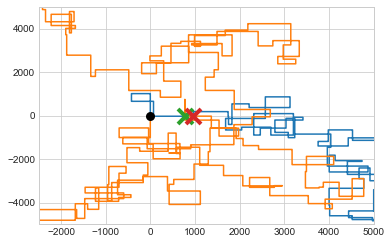

In [3]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
x = [item[0] for item in d_1_dict_steps]
y = [item[1] for item in d_1_dict_steps]
plt.plot(x, y,)
x = [item[0] for item in d_2_dict_steps]
y = [item[1] for item in d_2_dict_steps]
plt.plot(x, y,)
x = part1[0]
y = part1[1]
plt.plot(x, y, 'x',markersize=15,markeredgewidth=4,)
x = part2[0]
y = part2[1]
plt.plot(x, y, 'x',markersize=15,markeredgewidth=4,)
plt.plot(0, 0, 'o',markersize=5,markeredgewidth=4,color='black')
axes = plt.gca()
plt.xlim([-2500,5000])
plt.ylim([-5000,5000])
plt.show()
